In [1]:
import pandas as pd
df = pd.read_csv('../dataset/iris.csv', 
                 names = ["sl", "sw", "pl", "pw", "species"])

In [2]:
df.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1143.38x1000 with 20 Axes>

In [4]:
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

In [5]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [6]:
import numpy as np

Y = Y[:, np.newaxis]

In [7]:
data = np.concatenate((X, Y), axis=1)

In [8]:
dataset = pd.DataFrame({'sl':data[:,0],'sw':data[:,1], 'pl':data[:,2], 'pw':data[:,3], 'species':data[:,4]})

In [9]:
dataset.corr()

,pl,pw,sl,species,sw
pl,1.000000,0.962757,0.871754,0.949043,-0.420516
pw,0.962757,1.000000,0.817954,0.956464,-0.356544
sl,0.871754,0.817954,1.000000,0.782561,-0.109369
species,0.949043,0.956464,0.782561,1.000000,-0.419446
sw,-0.420516,-0.356544,-0.109369,-0.419446,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
pl         150 non-null float64
pw         150 non-null float64
sl         150 non-null float64
species    150 non-null float64
sw         150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


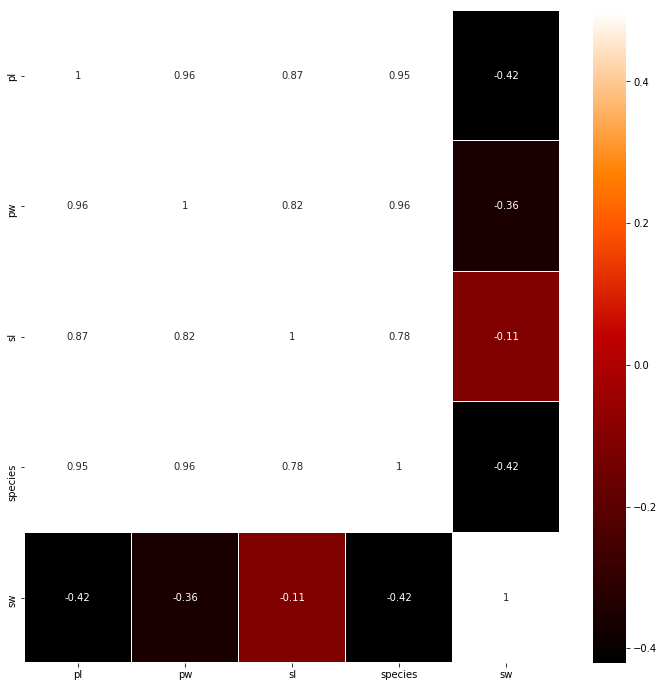

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(dataset.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

In [12]:
import tensorflow as tf
import os

In [13]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

Using TensorFlow backend.


In [14]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [15]:
df = pd.read_csv('../dataset/iris.csv', 
                 names = ["sl", "sw", "pl", "pw", "species"])

In [16]:
dataset = df.values
X = dataset[:, 0:4]
Y_obj = dataset[:, 4]
Y_obj

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [17]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
Y_encoded = np_utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [20]:
modelpath = "./model/iris.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor="val_loss", 
                               verbose=1, 
                               save_best_only=True)

In [21]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

In [23]:

model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=2000, batch_size=500,
         callbacks=[checkpointer, early_stopping_callback])


Train on 84 samples, validate on 21 samples
Epoch 1/2000
84/84 [==============================] - 0s 5ms/step - loss: 2.4507 - acc: 0.3929 - val_loss: 2.5955 - val_acc: 0.2857

Epoch 00001: val_loss improved from inf to 2.59552, saving model to ./model/iris.hdf5
Epoch 2/2000
84/84 [==============================] - 0s 42us/step - loss: 2.3977 - acc: 0.3929 - val_loss: 2.5318 - val_acc: 0.2857

Epoch 00002: val_loss improved from 2.59552 to 2.53179, saving model to ./model/iris.hdf5
Epoch 3/2000
84/84 [==============================] - 0s 44us/step - loss: 2.3451 - acc: 0.3929 - val_loss: 2.4691 - val_acc: 0.2857

Epoch 00003: val_loss improved from 2.53179 to 2.46907, saving model to ./model/iris.hdf5
Epoch 4/2000
84/84 [==============================] - 0s 36us/step - loss: 2.2933 - acc: 0.3929 - val_loss: 2.4068 - val_acc: 0.2857

Epoch 00004: val_loss improved from 2.46907 to 2.40677, saving model to ./model/iris.hdf5
Epoch 5/2000
84/84 [==============================] - 0s 46us/ste


Epoch 00037: val_loss improved from 1.15277 to 1.13346, saving model to ./model/iris.hdf5
Epoch 38/2000
84/84 [==============================] - 0s 94us/step - loss: 1.1479 - acc: 0.3929 - val_loss: 1.1154 - val_acc: 0.2857

Epoch 00038: val_loss improved from 1.13346 to 1.11542, saving model to ./model/iris.hdf5
Epoch 39/2000
84/84 [==============================] - 0s 59us/step - loss: 1.1310 - acc: 0.3929 - val_loss: 1.0986 - val_acc: 0.2857

Epoch 00039: val_loss improved from 1.11542 to 1.09862, saving model to ./model/iris.hdf5
Epoch 40/2000
84/84 [==============================] - 0s 48us/step - loss: 1.1145 - acc: 0.3929 - val_loss: 1.0825 - val_acc: 0.2857

Epoch 00040: val_loss improved from 1.09862 to 1.08254, saving model to ./model/iris.hdf5
Epoch 41/2000
84/84 [==============================] - 0s 40us/step - loss: 1.0982 - acc: 0.3929 - val_loss: 1.0672 - val_acc: 0.2857

Epoch 00041: val_loss improved from 1.08254 to 1.06722, saving model to ./model/iris.hdf5
Epoch 42/

Epoch 74/2000
84/84 [==============================] - 0s 64us/step - loss: 0.6953 - acc: 0.7143 - val_loss: 0.7712 - val_acc: 0.5714

Epoch 00074: val_loss improved from 0.77706 to 0.77116, saving model to ./model/iris.hdf5
Epoch 75/2000
84/84 [==============================] - 0s 51us/step - loss: 0.6876 - acc: 0.7143 - val_loss: 0.7655 - val_acc: 0.5714

Epoch 00075: val_loss improved from 0.77116 to 0.76545, saving model to ./model/iris.hdf5
Epoch 76/2000
84/84 [==============================] - 0s 60us/step - loss: 0.6802 - acc: 0.7262 - val_loss: 0.7599 - val_acc: 0.5714

Epoch 00076: val_loss improved from 0.76545 to 0.75988, saving model to ./model/iris.hdf5
Epoch 77/2000
84/84 [==============================] - 0s 58us/step - loss: 0.6730 - acc: 0.7262 - val_loss: 0.7544 - val_acc: 0.5714

Epoch 00077: val_loss improved from 0.75988 to 0.75439, saving model to ./model/iris.hdf5
Epoch 78/2000
84/84 [==============================] - 0s 39us/step - loss: 0.6660 - acc: 0.7262 - v


Epoch 00110: val_loss improved from 0.62583 to 0.62257, saving model to ./model/iris.hdf5
Epoch 111/2000
84/84 [==============================] - 0s 76us/step - loss: 0.5105 - acc: 0.7500 - val_loss: 0.6193 - val_acc: 0.7143

Epoch 00111: val_loss improved from 0.62257 to 0.61927, saving model to ./model/iris.hdf5
Epoch 112/2000
84/84 [==============================] - 0s 48us/step - loss: 0.5072 - acc: 0.7500 - val_loss: 0.6159 - val_acc: 0.7143

Epoch 00112: val_loss improved from 0.61927 to 0.61594, saving model to ./model/iris.hdf5
Epoch 113/2000
84/84 [==============================] - 0s 57us/step - loss: 0.5039 - acc: 0.7500 - val_loss: 0.6126 - val_acc: 0.7143

Epoch 00113: val_loss improved from 0.61594 to 0.61259, saving model to ./model/iris.hdf5
Epoch 114/2000
84/84 [==============================] - 0s 41us/step - loss: 0.5006 - acc: 0.7500 - val_loss: 0.6092 - val_acc: 0.7143

Epoch 00114: val_loss improved from 0.61259 to 0.60925, saving model to ./model/iris.hdf5
Epoch

Epoch 147/2000
84/84 [==============================] - 0s 90us/step - loss: 0.4126 - acc: 0.8690 - val_loss: 0.5114 - val_acc: 0.8095

Epoch 00147: val_loss improved from 0.51382 to 0.51139, saving model to ./model/iris.hdf5
Epoch 148/2000
84/84 [==============================] - 0s 71us/step - loss: 0.4103 - acc: 0.8810 - val_loss: 0.5090 - val_acc: 0.8095

Epoch 00148: val_loss improved from 0.51139 to 0.50896, saving model to ./model/iris.hdf5
Epoch 149/2000
84/84 [==============================] - 0s 48us/step - loss: 0.4081 - acc: 0.8810 - val_loss: 0.5065 - val_acc: 0.8095

Epoch 00149: val_loss improved from 0.50896 to 0.50652, saving model to ./model/iris.hdf5
Epoch 150/2000
84/84 [==============================] - 0s 35us/step - loss: 0.4058 - acc: 0.8810 - val_loss: 0.5041 - val_acc: 0.8095

Epoch 00150: val_loss improved from 0.50652 to 0.50408, saving model to ./model/iris.hdf5
Epoch 151/2000
84/84 [==============================] - 0s 59us/step - loss: 0.4036 - acc: 0.892


Epoch 00183: val_loss improved from 0.42074 to 0.41811, saving model to ./model/iris.hdf5
Epoch 184/2000
84/84 [==============================] - 0s 61us/step - loss: 0.3318 - acc: 0.9405 - val_loss: 0.4158 - val_acc: 0.8571

Epoch 00184: val_loss improved from 0.41811 to 0.41575, saving model to ./model/iris.hdf5
Epoch 185/2000
84/84 [==============================] - 0s 37us/step - loss: 0.3295 - acc: 0.9405 - val_loss: 0.4134 - val_acc: 0.8571

Epoch 00185: val_loss improved from 0.41575 to 0.41335, saving model to ./model/iris.hdf5
Epoch 186/2000
84/84 [==============================] - 0s 135us/step - loss: 0.3273 - acc: 0.9405 - val_loss: 0.4109 - val_acc: 0.8571

Epoch 00186: val_loss improved from 0.41335 to 0.41091, saving model to ./model/iris.hdf5
Epoch 187/2000
84/84 [==============================] - 0s 40us/step - loss: 0.3251 - acc: 0.9643 - val_loss: 0.4087 - val_acc: 0.8571

Epoch 00187: val_loss improved from 0.41091 to 0.40869, saving model to ./model/iris.hdf5
Epoc

Epoch 220/2000
84/84 [==============================] - 0s 55us/step - loss: 0.2681 - acc: 0.9881 - val_loss: 0.3537 - val_acc: 0.8571

Epoch 00220: val_loss improved from 0.35480 to 0.35366, saving model to ./model/iris.hdf5
Epoch 221/2000
84/84 [==============================] - 0s 80us/step - loss: 0.2668 - acc: 0.9881 - val_loss: 0.3525 - val_acc: 0.8571

Epoch 00221: val_loss improved from 0.35366 to 0.35253, saving model to ./model/iris.hdf5
Epoch 222/2000
84/84 [==============================] - 0s 54us/step - loss: 0.2655 - acc: 0.9881 - val_loss: 0.3514 - val_acc: 0.8571

Epoch 00222: val_loss improved from 0.35253 to 0.35139, saving model to ./model/iris.hdf5
Epoch 223/2000
84/84 [==============================] - 0s 88us/step - loss: 0.2642 - acc: 0.9881 - val_loss: 0.3502 - val_acc: 0.8571

Epoch 00223: val_loss improved from 0.35139 to 0.35022, saving model to ./model/iris.hdf5
Epoch 224/2000
84/84 [==============================] - 0s 46us/step - loss: 0.2628 - acc: 0.988


Epoch 00256: val_loss improved from 0.31233 to 0.31131, saving model to ./model/iris.hdf5
Epoch 257/2000
84/84 [==============================] - 0s 58us/step - loss: 0.2245 - acc: 0.9881 - val_loss: 0.3103 - val_acc: 0.8571

Epoch 00257: val_loss improved from 0.31131 to 0.31034, saving model to ./model/iris.hdf5
Epoch 258/2000
84/84 [==============================] - 0s 39us/step - loss: 0.2234 - acc: 0.9881 - val_loss: 0.3094 - val_acc: 0.8571

Epoch 00258: val_loss improved from 0.31034 to 0.30937, saving model to ./model/iris.hdf5
Epoch 259/2000
84/84 [==============================] - 0s 57us/step - loss: 0.2224 - acc: 0.9881 - val_loss: 0.3084 - val_acc: 0.8571

Epoch 00259: val_loss improved from 0.30937 to 0.30841, saving model to ./model/iris.hdf5
Epoch 260/2000
84/84 [==============================] - 0s 72us/step - loss: 0.2214 - acc: 0.9881 - val_loss: 0.3074 - val_acc: 0.8571

Epoch 00260: val_loss improved from 0.30841 to 0.30742, saving model to ./model/iris.hdf5
Epoch

Epoch 293/2000
84/84 [==============================] - 0s 75us/step - loss: 0.1899 - acc: 0.9881 - val_loss: 0.2748 - val_acc: 0.8571

Epoch 00293: val_loss improved from 0.27572 to 0.27484, saving model to ./model/iris.hdf5
Epoch 294/2000
84/84 [==============================] - 0s 69us/step - loss: 0.1890 - acc: 0.9881 - val_loss: 0.2740 - val_acc: 0.8571

Epoch 00294: val_loss improved from 0.27484 to 0.27397, saving model to ./model/iris.hdf5
Epoch 295/2000
84/84 [==============================] - 0s 241us/step - loss: 0.1881 - acc: 0.9881 - val_loss: 0.2731 - val_acc: 0.8571

Epoch 00295: val_loss improved from 0.27397 to 0.27310, saving model to ./model/iris.hdf5
Epoch 296/2000
84/84 [==============================] - 0s 107us/step - loss: 0.1873 - acc: 0.9881 - val_loss: 0.2722 - val_acc: 0.8571

Epoch 00296: val_loss improved from 0.27310 to 0.27223, saving model to ./model/iris.hdf5
Epoch 297/2000
84/84 [==============================] - 0s 50us/step - loss: 0.1864 - acc: 0.9


Epoch 00329: val_loss improved from 0.24742 to 0.24675, saving model to ./model/iris.hdf5
Epoch 330/2000
84/84 [==============================] - 0s 66us/step - loss: 0.1603 - acc: 0.9881 - val_loss: 0.2461 - val_acc: 0.8571

Epoch 00330: val_loss improved from 0.24675 to 0.24607, saving model to ./model/iris.hdf5
Epoch 331/2000
84/84 [==============================] - 0s 113us/step - loss: 0.1596 - acc: 0.9881 - val_loss: 0.2454 - val_acc: 0.8571

Epoch 00331: val_loss improved from 0.24607 to 0.24538, saving model to ./model/iris.hdf5
Epoch 332/2000
84/84 [==============================] - 0s 92us/step - loss: 0.1589 - acc: 0.9881 - val_loss: 0.2447 - val_acc: 0.8571

Epoch 00332: val_loss improved from 0.24538 to 0.24468, saving model to ./model/iris.hdf5
Epoch 333/2000
84/84 [==============================] - 0s 44us/step - loss: 0.1581 - acc: 0.9881 - val_loss: 0.2440 - val_acc: 0.8571

Epoch 00333: val_loss improved from 0.24468 to 0.24401, saving model to ./model/iris.hdf5
Epoc

Epoch 366/2000
84/84 [==============================] - 0s 30us/step - loss: 0.1365 - acc: 0.9881 - val_loss: 0.2249 - val_acc: 0.8571

Epoch 00366: val_loss improved from 0.22542 to 0.22491, saving model to ./model/iris.hdf5
Epoch 367/2000
84/84 [==============================] - 0s 117us/step - loss: 0.1359 - acc: 0.9881 - val_loss: 0.2244 - val_acc: 0.8571

Epoch 00367: val_loss improved from 0.22491 to 0.22440, saving model to ./model/iris.hdf5
Epoch 368/2000
84/84 [==============================] - 0s 39us/step - loss: 0.1353 - acc: 0.9881 - val_loss: 0.2239 - val_acc: 0.8571

Epoch 00368: val_loss improved from 0.22440 to 0.22388, saving model to ./model/iris.hdf5
Epoch 369/2000
84/84 [==============================] - 0s 88us/step - loss: 0.1347 - acc: 0.9881 - val_loss: 0.2233 - val_acc: 0.8571

Epoch 00369: val_loss improved from 0.22388 to 0.22335, saving model to ./model/iris.hdf5
Epoch 370/2000
84/84 [==============================] - 0s 87us/step - loss: 0.1342 - acc: 0.98


Epoch 00402: val_loss improved from 0.20964 to 0.20923, saving model to ./model/iris.hdf5
Epoch 403/2000
84/84 [==============================] - 0s 54us/step - loss: 0.1166 - acc: 0.9881 - val_loss: 0.2088 - val_acc: 0.8571

Epoch 00403: val_loss improved from 0.20923 to 0.20885, saving model to ./model/iris.hdf5
Epoch 404/2000
84/84 [==============================] - 0s 115us/step - loss: 0.1161 - acc: 0.9881 - val_loss: 0.2085 - val_acc: 0.8571

Epoch 00404: val_loss improved from 0.20885 to 0.20849, saving model to ./model/iris.hdf5
Epoch 405/2000
84/84 [==============================] - 0s 123us/step - loss: 0.1156 - acc: 0.9881 - val_loss: 0.2081 - val_acc: 0.8571

Epoch 00405: val_loss improved from 0.20849 to 0.20813, saving model to ./model/iris.hdf5
Epoch 406/2000
84/84 [==============================] - 0s 37us/step - loss: 0.1151 - acc: 0.9881 - val_loss: 0.2078 - val_acc: 0.8571

Epoch 00406: val_loss improved from 0.20813 to 0.20777, saving model to ./model/iris.hdf5
Epo

Epoch 439/2000
84/84 [==============================] - 0s 62us/step - loss: 0.1007 - acc: 0.9881 - val_loss: 0.1975 - val_acc: 0.9048

Epoch 00439: val_loss improved from 0.19780 to 0.19750, saving model to ./model/iris.hdf5
Epoch 440/2000
84/84 [==============================] - 0s 57us/step - loss: 0.1004 - acc: 0.9881 - val_loss: 0.1972 - val_acc: 0.9048

Epoch 00440: val_loss improved from 0.19750 to 0.19719, saving model to ./model/iris.hdf5
Epoch 441/2000
84/84 [==============================] - 0s 69us/step - loss: 0.1000 - acc: 0.9881 - val_loss: 0.1969 - val_acc: 0.9048

Epoch 00441: val_loss improved from 0.19719 to 0.19690, saving model to ./model/iris.hdf5
Epoch 442/2000
84/84 [==============================] - 0s 53us/step - loss: 0.0996 - acc: 0.9881 - val_loss: 0.1966 - val_acc: 0.9048

Epoch 00442: val_loss improved from 0.19690 to 0.19662, saving model to ./model/iris.hdf5
Epoch 443/2000
84/84 [==============================] - 0s 72us/step - loss: 0.0992 - acc: 0.988


Epoch 00475: val_loss improved from 0.18944 to 0.18926, saving model to ./model/iris.hdf5
Epoch 476/2000
84/84 [==============================] - 0s 39us/step - loss: 0.0875 - acc: 0.9881 - val_loss: 0.1891 - val_acc: 0.9048

Epoch 00476: val_loss improved from 0.18926 to 0.18908, saving model to ./model/iris.hdf5
Epoch 477/2000
84/84 [==============================] - 0s 53us/step - loss: 0.0872 - acc: 0.9881 - val_loss: 0.1889 - val_acc: 0.9048

Epoch 00477: val_loss improved from 0.18908 to 0.18890, saving model to ./model/iris.hdf5
Epoch 478/2000
84/84 [==============================] - 0s 50us/step - loss: 0.0869 - acc: 0.9881 - val_loss: 0.1887 - val_acc: 0.9048

Epoch 00478: val_loss improved from 0.18890 to 0.18871, saving model to ./model/iris.hdf5
Epoch 479/2000
84/84 [==============================] - 0s 49us/step - loss: 0.0865 - acc: 0.9881 - val_loss: 0.1885 - val_acc: 0.9048

Epoch 00479: val_loss improved from 0.18871 to 0.18853, saving model to ./model/iris.hdf5
Epoch

Epoch 512/2000
84/84 [==============================] - 0s 53us/step - loss: 0.0769 - acc: 0.9881 - val_loss: 0.1837 - val_acc: 0.9048

Epoch 00512: val_loss improved from 0.18381 to 0.18372, saving model to ./model/iris.hdf5
Epoch 513/2000
84/84 [==============================] - 0s 38us/step - loss: 0.0767 - acc: 0.9881 - val_loss: 0.1836 - val_acc: 0.9048

Epoch 00513: val_loss improved from 0.18372 to 0.18357, saving model to ./model/iris.hdf5
Epoch 514/2000
84/84 [==============================] - 0s 51us/step - loss: 0.0764 - acc: 0.9881 - val_loss: 0.1834 - val_acc: 0.9048

Epoch 00514: val_loss improved from 0.18357 to 0.18340, saving model to ./model/iris.hdf5
Epoch 515/2000
84/84 [==============================] - 0s 56us/step - loss: 0.0761 - acc: 0.9881 - val_loss: 0.1832 - val_acc: 0.9048

Epoch 00515: val_loss improved from 0.18340 to 0.18324, saving model to ./model/iris.hdf5
Epoch 516/2000
84/84 [==============================] - 0s 38us/step - loss: 0.0759 - acc: 0.988


Epoch 00548: val_loss improved from 0.17984 to 0.17978, saving model to ./model/iris.hdf5
Epoch 549/2000
84/84 [==============================] - 0s 39us/step - loss: 0.0679 - acc: 0.9881 - val_loss: 0.1797 - val_acc: 0.9048

Epoch 00549: val_loss improved from 0.17978 to 0.17968, saving model to ./model/iris.hdf5
Epoch 550/2000
84/84 [==============================] - 0s 52us/step - loss: 0.0677 - acc: 0.9881 - val_loss: 0.1796 - val_acc: 0.9048

Epoch 00550: val_loss improved from 0.17968 to 0.17959, saving model to ./model/iris.hdf5
Epoch 551/2000
84/84 [==============================] - 0s 48us/step - loss: 0.0675 - acc: 0.9881 - val_loss: 0.1795 - val_acc: 0.9048

Epoch 00551: val_loss improved from 0.17959 to 0.17952, saving model to ./model/iris.hdf5
Epoch 552/2000
84/84 [==============================] - 0s 39us/step - loss: 0.0673 - acc: 0.9881 - val_loss: 0.1794 - val_acc: 0.9048

Epoch 00552: val_loss improved from 0.17952 to 0.17942, saving model to ./model/iris.hdf5
Epoch

Epoch 585/2000
84/84 [==============================] - 0s 48us/step - loss: 0.0606 - acc: 0.9881 - val_loss: 0.1773 - val_acc: 0.9048

Epoch 00585: val_loss improved from 0.17735 to 0.17731, saving model to ./model/iris.hdf5
Epoch 586/2000
84/84 [==============================] - 0s 113us/step - loss: 0.0604 - acc: 0.9881 - val_loss: 0.1773 - val_acc: 0.9048

Epoch 00586: val_loss improved from 0.17731 to 0.17727, saving model to ./model/iris.hdf5
Epoch 587/2000
84/84 [==============================] - 0s 64us/step - loss: 0.0602 - acc: 0.9881 - val_loss: 0.1772 - val_acc: 0.9048

Epoch 00587: val_loss improved from 0.17727 to 0.17723, saving model to ./model/iris.hdf5
Epoch 588/2000
84/84 [==============================] - 0s 40us/step - loss: 0.0600 - acc: 0.9881 - val_loss: 0.1772 - val_acc: 0.9048

Epoch 00588: val_loss improved from 0.17723 to 0.17718, saving model to ./model/iris.hdf5
Epoch 589/2000
84/84 [==============================] - 0s 43us/step - loss: 0.0598 - acc: 0.98


Epoch 00622: val_loss improved from 0.17596 to 0.17588, saving model to ./model/iris.hdf5
Epoch 623/2000
84/84 [==============================] - 0s 52us/step - loss: 0.0540 - acc: 0.9881 - val_loss: 0.1758 - val_acc: 0.9048

Epoch 00623: val_loss improved from 0.17588 to 0.17580, saving model to ./model/iris.hdf5
Epoch 624/2000
84/84 [==============================] - 0s 45us/step - loss: 0.0539 - acc: 0.9881 - val_loss: 0.1757 - val_acc: 0.9048

Epoch 00624: val_loss improved from 0.17580 to 0.17574, saving model to ./model/iris.hdf5
Epoch 625/2000
84/84 [==============================] - 0s 65us/step - loss: 0.0537 - acc: 0.9881 - val_loss: 0.1757 - val_acc: 0.9048

Epoch 00625: val_loss improved from 0.17574 to 0.17572, saving model to ./model/iris.hdf5
Epoch 626/2000
84/84 [==============================] - 0s 40us/step - loss: 0.0535 - acc: 0.9881 - val_loss: 0.1757 - val_acc: 0.9048

Epoch 00626: val_loss improved from 0.17572 to 0.17571, saving model to ./model/iris.hdf5
Epoch


Epoch 00662: val_loss did not improve from 0.17549
Epoch 663/2000
84/84 [==============================] - 0s 72us/step - loss: 0.0482 - acc: 0.9881 - val_loss: 0.1757 - val_acc: 0.9048

Epoch 00663: val_loss did not improve from 0.17549
Epoch 664/2000
84/84 [==============================] - 0s 46us/step - loss: 0.0481 - acc: 0.9881 - val_loss: 0.1756 - val_acc: 0.9048

Epoch 00664: val_loss did not improve from 0.17549
Epoch 665/2000
84/84 [==============================] - 0s 57us/step - loss: 0.0480 - acc: 0.9881 - val_loss: 0.1756 - val_acc: 0.9048

Epoch 00665: val_loss did not improve from 0.17549
Epoch 666/2000
84/84 [==============================] - 0s 59us/step - loss: 0.0478 - acc: 0.9881 - val_loss: 0.1756 - val_acc: 0.9048

Epoch 00666: val_loss did not improve from 0.17549
Epoch 667/2000
84/84 [==============================] - 0s 59us/step - loss: 0.0477 - acc: 0.9881 - val_loss: 0.1755 - val_acc: 0.9048

Epoch 00667: val_loss did not improve from 0.17549
Epoch 668/200


Epoch 00706: val_loss did not improve from 0.17549
Epoch 707/2000
84/84 [==============================] - 0s 74us/step - loss: 0.0429 - acc: 1.0000 - val_loss: 0.1761 - val_acc: 0.9048

Epoch 00707: val_loss did not improve from 0.17549
Epoch 708/2000
84/84 [==============================] - 0s 86us/step - loss: 0.0428 - acc: 1.0000 - val_loss: 0.1760 - val_acc: 0.9048

Epoch 00708: val_loss did not improve from 0.17549
Epoch 709/2000
84/84 [==============================] - 0s 113us/step - loss: 0.0427 - acc: 1.0000 - val_loss: 0.1760 - val_acc: 0.9048

Epoch 00709: val_loss did not improve from 0.17549
Epoch 710/2000
84/84 [==============================] - 0s 47us/step - loss: 0.0426 - acc: 1.0000 - val_loss: 0.1759 - val_acc: 0.9048

Epoch 00710: val_loss did not improve from 0.17549
Epoch 711/2000
84/84 [==============================] - 0s 65us/step - loss: 0.0425 - acc: 1.0000 - val_loss: 0.1759 - val_acc: 0.9048

Epoch 00711: val_loss did not improve from 0.17549
Epoch 712/20


Epoch 00750: val_loss did not improve from 0.17549
Epoch 751/2000
84/84 [==============================] - 0s 43us/step - loss: 0.0384 - acc: 1.0000 - val_loss: 0.1770 - val_acc: 0.9048

Epoch 00751: val_loss did not improve from 0.17549
Epoch 752/2000
84/84 [==============================] - 0s 70us/step - loss: 0.0383 - acc: 1.0000 - val_loss: 0.1770 - val_acc: 0.9048

Epoch 00752: val_loss did not improve from 0.17549
Epoch 753/2000
84/84 [==============================] - 0s 71us/step - loss: 0.0382 - acc: 1.0000 - val_loss: 0.1771 - val_acc: 0.9048

Epoch 00753: val_loss did not improve from 0.17549
Epoch 754/2000
84/84 [==============================] - 0s 76us/step - loss: 0.0381 - acc: 1.0000 - val_loss: 0.1771 - val_acc: 0.9048

Epoch 00754: val_loss did not improve from 0.17549


In [24]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

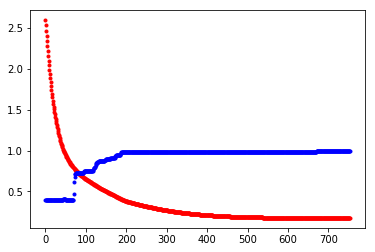

In [25]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

In [26]:
print("Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

45/45 [==============================] - 0s 707us/step
Accuracy: 0.9556


In [28]:
del model

NameError: name 'model' is not defined

In [29]:
model = load_model('./model/iris.hdf5')

In [30]:
print("Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

45/45 [==============================] - 0s 2ms/step
Accuracy: 0.9556
